# Pocket Test

In [1]:
import json

with open('../cmake-build-debug/bin/training_output/pocket_training_evolution.json', 'r') as file:
    test_output = json.load(file)

In [2]:
test_data = test_output['data']
test_labels = test_output['labels']
learning_evolution = test_output['weights']
learning_losses = test_output['losses']

trainig_iterations = len(learning_evolution)
weights = learning_evolution[-1]

In [3]:
test_data

[[0.0, 2.0],
 [1.0, 0.0],
 [1.0, 1.0],
 [1.0, 2.0],
 [1.0, 3.0],
 [1.0, 3.5],
 [2.0, 1.0],
 [2.0, 2.0],
 [2.0, 3.0],
 [2.0, 3.5],
 [3.0, 0.0],
 [3.0, 2.0],
 [2.7, 3.3],
 [4.0, 1.0],
 [1.0, 4.0],
 [2.0, 4.0],
 [2.0, 5.0],
 [2.5, 3.0],
 [2.5, 4.0],
 [3.0, 3.0],
 [3.0, 4.5],
 [3.0, 6.0],
 [4.0, 2.5],
 [4.0, 3.5],
 [4.0, 5.0],
 [5.0, 2.0],
 [5.0, 3.0],
 [5.0, 4.0]]

In [4]:
red_dots = []
blue_dots = []

for i, dot in enumerate(test_data):
    if test_labels[i] == 1:
        red_dots.append(dot)
    elif test_labels[i] == -1:
        blue_dots.append(dot)

In [5]:
def hypothesis(x):
    return (-(weights[0]/weights[1]) * x) - (weights[2] / weights[1])

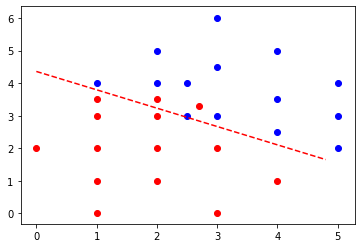

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter([point[0] for point in red_dots], [point[1] for point in red_dots], c='red')
plt.scatter([point[0] for point in blue_dots], [point[1] for point in blue_dots], c='blue')

x = np.arange(0., 5., 0.2)
y = []

for t in x:
    y.append(hypothesis(t))
    
plt.plot(x, y, 'r--')
plt.savefig('../plots/pocket_model_view.png')

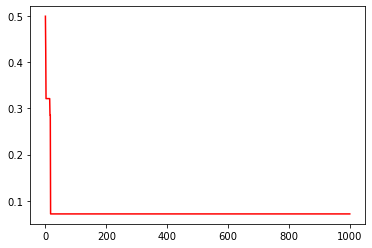

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(learning_losses))
y = []

for t in x:
    y.append(learning_losses[t])
    
plt.plot(x, y, 'r')
plt.savefig('../plots/pocket_loss.png')